In [38]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

### Import the data

In [47]:
#visualise t. brucei
tbb_table = pd.read_table('tbb.txt')
tbb_table.head()

control = tbb_table[tbb_table['g']=='control']
melarsoprol = tbb_table[tbb_table['g']=='melarsoprol']
compound25 = tbb_table[tbb_table['g']=='compound25']

### Create a Kaplan Meier survaival plot

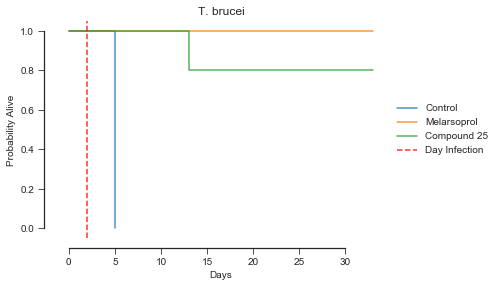

In [49]:
#the actual plot
fig,ax = plt.subplots()
kmf = KaplanMeierFitter()

kmf.fit(control['T'].values,
        control['E'].values,
        label='Control',
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8)



kmf.fit(melarsoprol['T'].values,
        melarsoprol['E'].values,
        label='Melarsoprol'
        )
kmf.plot(ax=ax,ci_show=False,alpha=0.8)

kmf.fit(compound25['T'].values,
        compound25['E'].values,
        label='Compound 25'
       )
kmf.plot(ax=ax,ci_show=False,alpha=0.8)

sns.set_style("ticks")
sns.despine(offset=10, trim=True)
ax.axvline(2,c='r',ls='--',alpha=0.8,label='Day Infection')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Days')
plt.ylabel('Probability Alive')
plt.title("T. brucei")
plt.show()
#kmf.event_table

### Stats time

In [51]:
#significance between the control and Melarsoprol
results = logrank_test(control['T'],
                       melarsoprol['T'],
                       control['E'],
                       melarsoprol['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [52]:
#significance between the control and Compound 25
results = logrank_test(control['T'],
                       compound25['T'],
                       control['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        8.0000 0.0047  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [53]:
#sanity check, significance between the Melarsoprol and Compound 25
results = logrank_test(melarsoprol['T'],
                       compound25['T'],
                       melarsoprol['E'],
                       compound25['E'], alpha=.99)
results.print_summary()


t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        1.0000 0.3173
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


In [55]:
!git add *
!git commit -m 'add requirment'
!git push -u origin master

[master (root-commit) 8ba0565] first commit
 Committer: Michele Tinti <mtinti@ls29490.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 235 insertions(+)
 create mode 100644 Survival Plots.ipynb
 create mode 100644 tbb.txt


In [56]:
#!git remote add origin https://github.com/mtinti/survival_plots.git


Counting objects: 4, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 12.58 KiB | 0 bytes/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/mtinti/survival_plots.git
 * [new branch]      master -> master
Branch master set up to track remote branch master from origin.
